<a href="https://colab.research.google.com/github/NehaKumari500092077/Machine-Learning-Lab/blob/main/Session_2_Assignments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Task - 1:
Dataset creation using make_regression of scikit-learn [Mark - 0]

In [ ]:
# Creating regression dataset
# from sklearn.datasets import make_regression
# import pandas as pd

# # Creating a toy regression dataset with 5 features
# X_gen, y_gen = make_regression(n_samples=1000, n_features=5, noise=0.1, random_state=42)

# # Combine the features and target into one DataFrame
# df = pd.DataFrame(X_gen, columns=[f'Feature_{i}' for i in range(1, 6)])
# df['target'] = y_gen

# # Save the DataFrame to a CSV file
# df.to_csv('regression_dataset.csv', index=False)

In [16]:
import numpy as np
import pandas as pd
# Importing the dataset
dataset = pd.read_csv('https://raw.githubusercontent.com/Rekha215/Machine-Learning-Laboratory/main/regression_dataset.csv')

# all columns are features remaining the last one
X = dataset.drop(columns=['target']).values
Y = dataset['target'].values

# split data into traing, testing and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_validation , Y_train, Y_validation = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)

#### Task - 2:
Two K-NN regressor implementations (from scratch)
1. Average of K-nearest neighbors [Marks - 5]
2. Weighted average of k nearest neighbors, with weights being inverse of distances from the k neighbors [Marks - 5]

In [4]:
import numpy as np

def manhattan_distance(x, y):
  return np.abs(x - y).sum();

def euclidian_distance(x, y):
  return np.sqrt(np.sum((x - y) ** 2))

def chebyshev_distance(x, y):
  return np.max(np.abs(x - y))

def cosine_distance(x, y):
  dot_product = np.dot(x, y)
  x_magnitude = np.linalg.norm(x)
  y_magnitude = np.linalg.norm(y)
  cosine_similarity = dot_product/( x_magnitude +  y_magnitude)
  return 1-cosine_similarity

def minkowski_distance(x, y, p):
  return np.sum(np.abs(x - y) ** p) ** (1 / p);

def find_distance(x, p):
    if p == 1:
      distance_array = [manhattan_distance(x, x_train) for x_train in X_train]
    elif p == 2:
      distance_array = [euclidian_distance(x, x_train) for x_train in X_train]
    elif p == 3:
      distance_array = [chebyshev_distance(x, x_train) for x_train in X_train]
    elif p == 4:
      distance_array = [cosine_distance(x, x_train) for x_train in X_train]
    elif p > 4:
      distance_array = [minkowski_distance(x, x_train, p) for x_train in X_train]
    else:
      raise ValueError("Unsupported distance metric")

    return distance_array

In [29]:

# Average of KNN implementation
class AverageKNNRegressor:

  def __init__(self, k, p):
    self.k=k
    self.p=p

  def fit_training_data(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict_result(self, X_test):
    predicted_value = []
    for x in X_test:
      distance_array = find_distance(x, self.p)

      #store the k nearest indices from training feature set
      k_nearest_indices = np.argsort(distance_array)[:self.k]

      #store the corresponding target value k nearest indices from training feature set
      k_nearest_target_value = self.Y_train[k_nearest_indices]

      #calculte average of target value and store it
      predicted_value.append(np.mean(k_nearest_target_value))

    return predicted_value



In [28]:
# Weighted average of KNN implementation

class WeightedAverageKNNRegressor:

  def __init__(self, k, p):
    self.k = k
    self.p = p

  def fit_training_data(self, X_train, Y_train):
    self.X_train = X_train
    self.Y_train = Y_train

  def predict_result(self, X_test):
    predicted_value = []
    for x in X_test:
      distance_array = find_distance(x, self.p)

      #store the k nearest indices from training feature set
      k_nearest_indices = np.argsort(distance_array)[:self.k]

      #store k nearest distance from calculated distance_array
      k_nearest_distances = [distance_array[index] for index in k_nearest_indices]

      #store the corresponding target value k nearest indices from training feature set
      k_nearest_target_value = self.Y_train[k_nearest_indices]

      #avoid zero distance with a small value to avoid division by zero
      k_nearest_distances = np.where(k_nearest_distances == 0, 1e-10, k_nearest_distances)

      #inverse distances to compute weights
      weights = [1 / d for d in k_nearest_distances]

      #weighted average
      weighted_average = np.sum(weights * k_nearest_target_value) / np.sum(weights)

      predicted_value.append(weighted_average)

    return predicted_value




#### Task - 3:
Plot regression metric (mean squared error) against different values of k ``` {3, 7, 11}``` and different distance measures ```{p=2, p=1, p=5}```and report the k value and distance measure combination that gave the best performance (lowest MSE) [Marks - 4]

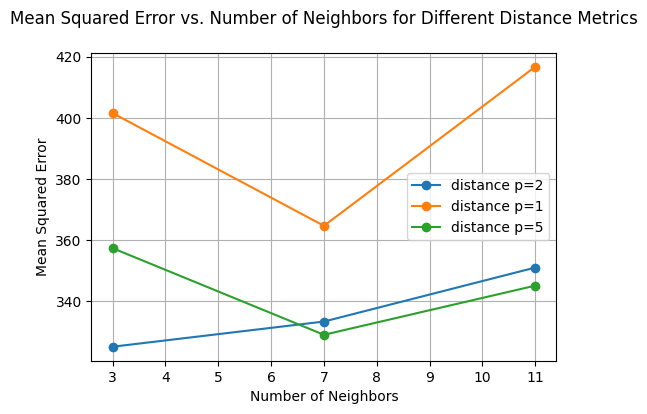


Best performance: k=3.0, p=2.0, MSE=325.00767236296764


In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

K_data = [3, 7, 11]
P_data = [2, 1, 5]
scratch_result = []

for k in K_data:
  for p in P_data:

    #initialize the model
    obj = AverageKNNRegressor(k, p)
    obj.fit_training_data(X_train, Y_train)

    #make the prediction and find mean-square-error
    predictedData = obj.predict_result(X_test)
    mse = mean_squared_error(Y_test, predictedData)
    scratch_result.append((k, p, mse))

scratch_result_df = pd.DataFrame(scratch_result, columns=['k', 'p', 'mse'])

#plot mean-square-error against k values for each distance measures
plt.figure(figsize=(6, 4))
for p in P_data:
  plotData = scratch_result_df[scratch_result_df['p'] == p]
  plt.plot(plotData['k'], plotData['mse'], marker='o', label=f'distance p={p}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Neighbors for Different Distance Metrics\n')
plt.legend()
plt.grid(True)
plt.show()

min_mse_index = np.argmin(scratch_result_df['mse'].values)
best_scratch_result = scratch_result_df.iloc[min_mse_index]
print(f"\nBest performance: k={best_scratch_result['k']}, p={best_scratch_result['p']}, MSE={best_scratch_result['mse']}")

#### Task - 4:
Implement KNN regression using scikit-learn, with the same values of k and p as above

##### Note - one argument of scikit-learn KNN is ```algorithm='auto'``` and acceptable values are ```{'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto' ```. For this task use ```'brute'``` setting.

[Marks - 4]

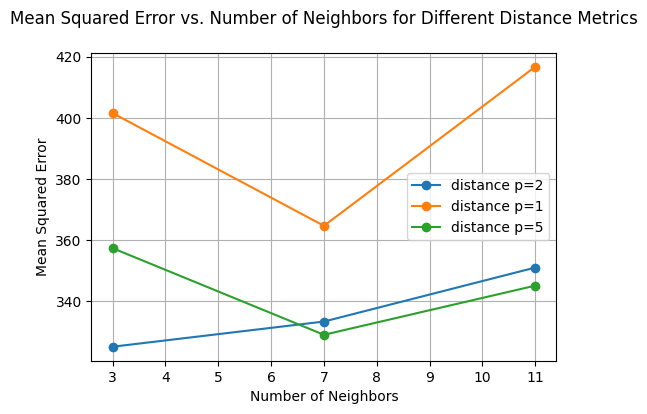

In [32]:
from sklearn.neighbors import KNeighborsRegressor

sklearn_result = []
for k in K_data:
  for p in P_data:

    #initialize the model
    model = KNeighborsRegressor(n_neighbors = k, p = p, algorithm = 'brute')
    model.fit(X_train, Y_train)

    #make the prediction and find mean-square-error
    predictedData = model.predict(X_test)
    mse = mean_squared_error(Y_test, predictedData)
    sklearn_result.append((k, p, mse))

sklearn_result_df = pd.DataFrame(sklearn_result, columns=['k', 'p', 'mse'])

#plot mean-square-error against k values for each distance measures
plt.figure(figsize=(6, 4))
for p in P_data:
  plotData = sklearn_result_df[sklearn_result_df['p'] == p]
  plt.plot(plotData['k'], plotData['mse'], marker='o', label=f'distance p={p}')

plt.xlabel('Number of Neighbors')
plt.ylabel('Mean Squared Error')
plt.title('Mean Squared Error vs. Number of Neighbors for Different Distance Metrics\n')
plt.legend()
plt.grid(True)
plt.show()





#### Task - 5:
Comparison with scikit-learn's implementation - Does the optimal values of k and distance metric as well as best performance level of the from scratch implementation match with those given by Sklearn?

 [Marks - 2]

In [36]:
#best result by scratch implementation
min_mse_index = np.argmin(scratch_result_df['mse'].values)
best_scratch_result = scratch_result_df.iloc[min_mse_index]
print(f"\nBest performance (from scratch): k={best_scratch_result['k']}, p={best_scratch_result['p']}, MSE={best_scratch_result['mse']}")

#best result using Sklearn
min_mse_index = np.argmin(sklearn_result_df['mse'].values)
best_sklearn_result = sklearn_result_df.iloc[min_mse_index]
print(f"\nBest performance (from Sklearn): k={best_sklearn_result['k']}, p={best_sklearn_result['p']}, MSE={best_sklearn_result['mse']}")

#compare
if(best_scratch_result['k'] == best_sklearn_result['k'] and best_scratch_result['p'] == best_sklearn_result['p']):
  print("\nThe optimal values of k and distance metric are the same for both implementations")
else:
  print("\nThe optimal values of k and distance metric are differ between the implementations ")



Best performance (from scratch): k=3.0, p=2.0, MSE=325.00767236296764

Best performance (from Sklearn): k=3.0, p=2.0, MSE=325.00767236296764

The optimal values of k and distance metric are the same for both implementations
